In [1]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

import os
import keras
import h5py
import librosa
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2699833484643603260
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1519183462
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7940084141543672861
physical_device_desc: "device: 0, name: GeForce GT 740M, pci bus id: 0000:01:00.0, compute capability: 3.5"
]


In [8]:
def split_song(X, y, window = 0.1, overlap = 0.5):
    # Empty lists to hold our results
    temp_X = []
    temp_y = []

    # Get the input song array size
    shape = X.shape[0]
    chunk = int(shape*window)
    offset = int(chunk*(1.-overlap))
    # Split the song and create new ones on windows
    spsong = [X[i:i+chunk] for i in range(0, shape - chunk + offset, offset)]
    for s in spsong:
        temp_X.append(s)
        temp_y.append(y)

    return np.array(temp_X), np.array(temp_y)

In [9]:
def extract_melspectrogram(songs):
    # Transformation function
    melspec = lambda x: librosa.feature.melspectrogram(x, n_fft = 1024, hop_length = 512)[:,:,np.newaxis]

    # map transformation of input songs to melspectrogram using log-scale
    tsongs = map(melspec, songs)
    return np.array(list(tsongs))

In [13]:
def read_data(src_dir, genres, song_samples):
    # Empty array of dicts with the processed features from all files
    arr_specs = []
    arr_genres = []

    # Read files from the folders
    for genre, _ in genres.items():
        folder = src_dir + genre
        
        for root, subdirs, files in os.walk(folder):
            for file in files:
                # Read the audio file
                file_name = folder + "/" + file
                print("Read file: {}".format(file_name))
                
                signal, sr = librosa.load(file_name)
                signal = signal[:song_samples]

                # Convert to dataset of spectograms/melspectograms
                signals, y = split_song(signal, genres[genre])
                
                # Convert to "spec" representation
                specs = extract_melspectrogram(signals)
                # Save files
                arr_genres.extend(y)
                arr_specs.extend(specs)
    return np.array(arr_specs), np.array(arr_genres)

In [14]:
song_samples = 660000
genres = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4, 
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}
train_folder = 'data/genres2/'

In [15]:
 X, y = read_data(train_folder, genres, song_samples)

Read file: data/genres2/metal/metal.00000.au
Read file: data/genres2/metal/metal.00001.au
Read file: data/genres2/metal/metal.00002.au
Read file: data/genres2/metal/metal.00003.au
Read file: data/genres2/metal/metal.00004.au
Read file: data/genres2/metal/metal.00005.au
Read file: data/genres2/metal/metal.00006.au
Read file: data/genres2/metal/metal.00007.au
Read file: data/genres2/metal/metal.00008.au
Read file: data/genres2/metal/metal.00009.au
Read file: data/genres2/metal/metal.00010.au
Read file: data/genres2/metal/metal.00011.au
Read file: data/genres2/metal/metal.00012.au
Read file: data/genres2/metal/metal.00013.au
Read file: data/genres2/metal/metal.00014.au
Read file: data/genres2/metal/metal.00015.au
Read file: data/genres2/metal/metal.00016.au
Read file: data/genres2/metal/metal.00017.au
Read file: data/genres2/metal/metal.00018.au
Read file: data/genres2/metal/metal.00019.au
Read file: data/genres2/metal/metal.00020.au
Read file: data/genres2/metal/metal.00021.au
Read file:

Read file: data/genres2/disco/disco.00083.au
Read file: data/genres2/disco/disco.00084.au
Read file: data/genres2/disco/disco.00085.au
Read file: data/genres2/disco/disco.00086.au
Read file: data/genres2/disco/disco.00087.au
Read file: data/genres2/disco/disco.00088.au
Read file: data/genres2/disco/disco.00089.au
Read file: data/genres2/disco/disco.00090.au
Read file: data/genres2/disco/disco.00091.au
Read file: data/genres2/disco/disco.00092.au
Read file: data/genres2/disco/disco.00093.au
Read file: data/genres2/disco/disco.00094.au
Read file: data/genres2/disco/disco.00095.au
Read file: data/genres2/disco/disco.00096.au
Read file: data/genres2/disco/disco.00097.au
Read file: data/genres2/disco/disco.00098.au
Read file: data/genres2/disco/disco.00099.au
Read file: data/genres2/classical/classical.00000.au
Read file: data/genres2/classical/classical.00001.au
Read file: data/genres2/classical/classical.00002.au
Read file: data/genres2/classical/classical.00003.au
Read file: data/genres2

Read file: data/genres2/hiphop/hiphop.00046.au
Read file: data/genres2/hiphop/hiphop.00047.au
Read file: data/genres2/hiphop/hiphop.00048.au
Read file: data/genres2/hiphop/hiphop.00049.au
Read file: data/genres2/hiphop/hiphop.00050.au
Read file: data/genres2/hiphop/hiphop.00051.au
Read file: data/genres2/hiphop/hiphop.00052.au
Read file: data/genres2/hiphop/hiphop.00053.au
Read file: data/genres2/hiphop/hiphop.00054.au
Read file: data/genres2/hiphop/hiphop.00055.au
Read file: data/genres2/hiphop/hiphop.00056.au
Read file: data/genres2/hiphop/hiphop.00057.au
Read file: data/genres2/hiphop/hiphop.00058.au
Read file: data/genres2/hiphop/hiphop.00059.au
Read file: data/genres2/hiphop/hiphop.00060.au
Read file: data/genres2/hiphop/hiphop.00061.au
Read file: data/genres2/hiphop/hiphop.00062.au
Read file: data/genres2/hiphop/hiphop.00063.au
Read file: data/genres2/hiphop/hiphop.00064.au
Read file: data/genres2/hiphop/hiphop.00065.au
Read file: data/genres2/hiphop/hiphop.00066.au
Read file: da

Read file: data/genres2/country/country.00028.au
Read file: data/genres2/country/country.00029.au
Read file: data/genres2/country/country.00030.au
Read file: data/genres2/country/country.00031.au
Read file: data/genres2/country/country.00032.au
Read file: data/genres2/country/country.00033.au
Read file: data/genres2/country/country.00034.au
Read file: data/genres2/country/country.00035.au
Read file: data/genres2/country/country.00036.au
Read file: data/genres2/country/country.00037.au
Read file: data/genres2/country/country.00038.au
Read file: data/genres2/country/country.00039.au
Read file: data/genres2/country/country.00040.au
Read file: data/genres2/country/country.00041.au
Read file: data/genres2/country/country.00042.au
Read file: data/genres2/country/country.00043.au
Read file: data/genres2/country/country.00044.au
Read file: data/genres2/country/country.00045.au
Read file: data/genres2/country/country.00046.au
Read file: data/genres2/country/country.00047.au
Read file: data/genr

Read file: data/genres2/blues/blues.00013.au
Read file: data/genres2/blues/blues.00014.au
Read file: data/genres2/blues/blues.00015.au
Read file: data/genres2/blues/blues.00016.au
Read file: data/genres2/blues/blues.00017.au
Read file: data/genres2/blues/blues.00018.au
Read file: data/genres2/blues/blues.00019.au
Read file: data/genres2/blues/blues.00020.au
Read file: data/genres2/blues/blues.00021.au
Read file: data/genres2/blues/blues.00022.au
Read file: data/genres2/blues/blues.00023.au
Read file: data/genres2/blues/blues.00024.au
Read file: data/genres2/blues/blues.00025.au
Read file: data/genres2/blues/blues.00026.au
Read file: data/genres2/blues/blues.00027.au
Read file: data/genres2/blues/blues.00028.au
Read file: data/genres2/blues/blues.00029.au
Read file: data/genres2/blues/blues.00030.au
Read file: data/genres2/blues/blues.00031.au
Read file: data/genres2/blues/blues.00032.au
Read file: data/genres2/blues/blues.00033.au
Read file: data/genres2/blues/blues.00034.au
Read file:

Read file: data/genres2/reggae/reggae.00092.au
Read file: data/genres2/reggae/reggae.00093.au
Read file: data/genres2/reggae/reggae.00094.au
Read file: data/genres2/reggae/reggae.00095.au
Read file: data/genres2/reggae/reggae.00096.au
Read file: data/genres2/reggae/reggae.00097.au
Read file: data/genres2/reggae/reggae.00098.au
Read file: data/genres2/reggae/reggae.00099.au
Read file: data/genres2/rock/rock.00000.au
Read file: data/genres2/rock/rock.00001.au
Read file: data/genres2/rock/rock.00002.au
Read file: data/genres2/rock/rock.00003.au
Read file: data/genres2/rock/rock.00004.au
Read file: data/genres2/rock/rock.00005.au
Read file: data/genres2/rock/rock.00006.au
Read file: data/genres2/rock/rock.00007.au
Read file: data/genres2/rock/rock.00008.au
Read file: data/genres2/rock/rock.00009.au
Read file: data/genres2/rock/rock.00010.au
Read file: data/genres2/rock/rock.00011.au
Read file: data/genres2/rock/rock.00012.au
Read file: data/genres2/rock/rock.00013.au
Read file: data/genres

In [16]:
np.save('data/x_datasets.npy', X)
np.save('data/y_datasets.npy', y)

In [2]:
X = np.load('data/x_datasets.npy')
y = np.load('data/y_datasets.npy')

In [3]:
y = to_categorical(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [5]:
del X
del y
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13300, 128, 129, 1) (5700, 128, 129, 1) (13300, 10) (5700, 10)


In [6]:
# Model Definition
input_shape = X_train[0].shape
num_genres = 10

model = Sequential()
# Conv Block 1
model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 4
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 5
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Dropout(0.25))

# MLP
model.add(Flatten())
model.add(Dense(num_genres, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 127, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 13300 samples, validate on 5700 samples
Epoch 1/50
13300/13300 [==============================] - 94s 7ms/step - loss: 2.1570 - acc: 0.2313 - val_loss: 1.9128 - val_acc: 0.3146
Epoch 2/50
13300/13300 [==============================] - 85s 6ms/step - loss: 1.7267 - acc: 0.3786 - val_loss: 1.5549 - val_acc: 0.4377
Epoch 3/50
13300/13300 [==============================] - 84s 6ms/step - loss: 1.5155 - acc: 0.4629 - val_loss: 1.3912 - val_acc: 0.5077
Epoch 4/50
13300/13300 [==============================] - 86s 6ms/step - loss: 1.4068 - acc: 0.4990 - val_loss: 1.3026 - val_acc: 0.5621
Epoch 5/50
13300/13300 [==============================] - 91s 7ms/step - loss: 1.3297 - acc: 0.5353 - val_loss: 1.2652 - val_acc: 0.5484
Epoch 6/50
13300/13300 [==============================] - 102s 8ms/step - loss: 1.2487 - acc: 0.5662 - val_loss: 1.1923 - val_acc: 0.5865
Epoch 7/50
13300/13300 [==============================] - 107s 8ms/step - loss: 1.1934 - acc: 0.5887 - val_loss: 1.1176 - val_ac

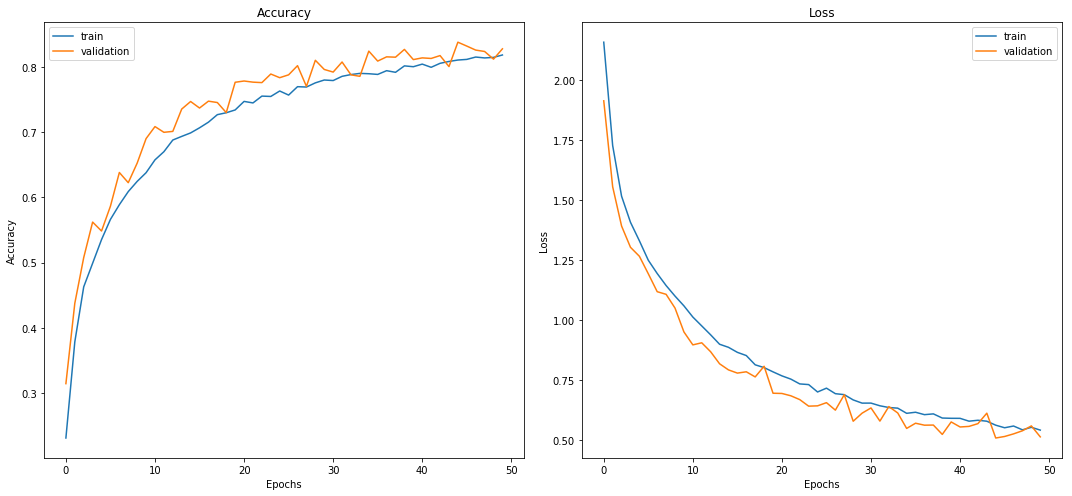

In [10]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig('assets/graph_train.png')

plt.tight_layout()
plt.show()


In [8]:
# Save the model
model.save('models/model_snn.h5')